In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

In [4]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [85]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [86]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<Axes: >

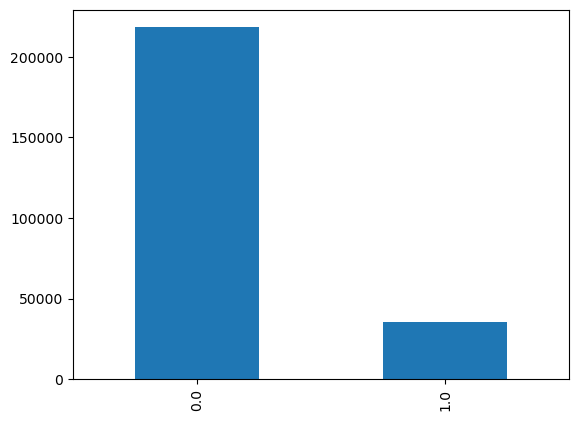

In [87]:
df["Diabetes_binary"].value_counts().plot(kind = "bar")

In [88]:
df[df["Diabetes_binary"] == 1]["Diabetes_binary"].count()/df["Diabetes_binary"].count()

0.13933301797540207

<Axes: >

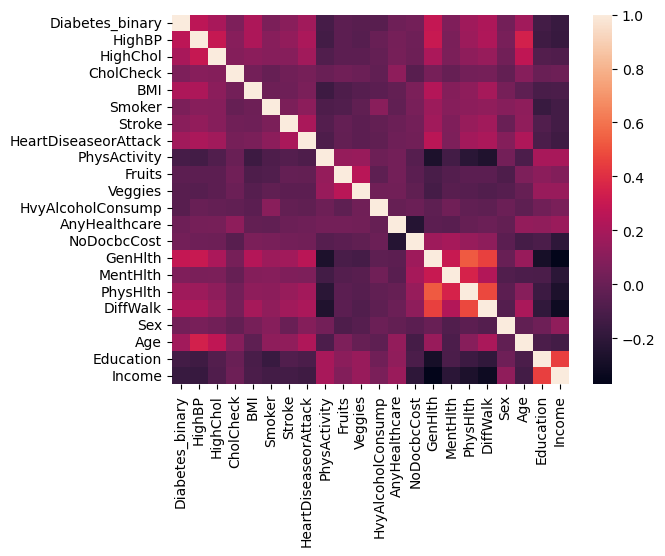

In [89]:
sns.heatmap(df.corr())

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
from tensorflow.keras.layers import Dense, Dropout

In [172]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", mode=min , patience= 25, verbose= 1)

In [193]:
model = Sequential()



In [194]:
model.add(Dense(units = 20, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 18, activation= "sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(units = 18, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 15, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 15, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 10, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 5, activation= "sigmoid"))


model.add(Dense(units = 1, activation= "sigmoid"))

model.compile(optimizer= "adam", loss= "binary_crossentropy")

In [175]:
model.fit(x = X_train, y = y_train, epochs=2, validation_data = (X_test, y_test), callbacks= [early_stopping])

Epoch 1/2
5550/5550 [==============================] - 23s 4ms/step - loss: 0.3401 - val_loss: 0.3290
Epoch 2/2
5550/5550 [==============================] - 23s 4ms/step - loss: 0.3349 - val_loss: 0.3259


<Axes: >

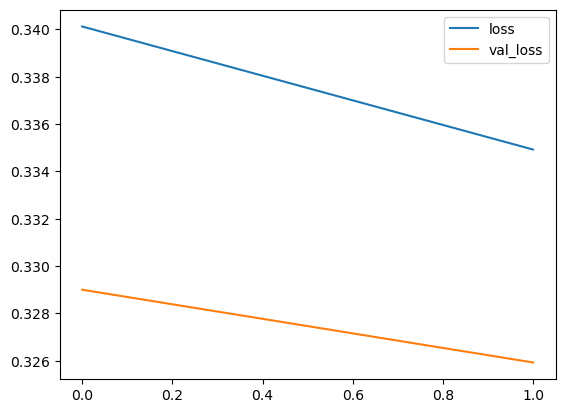

In [176]:
pd.DataFrame(model.history.history).plot()

In [177]:
predictions = np.round(model.predict(X_test))

2379/2379 [==============================] - 5s 2ms/step


In [178]:
from sklearn.metrics import classification_report, confusion_matrix

In [179]:
print(confusion_matrix(y_test, predictions))

[[65376     0]
 [10728     0]]


In [180]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92     65376
         1.0       0.00      0.00      0.00     10728

    accuracy                           0.86     76104
   macro avg       0.43      0.50      0.46     76104
weighted avg       0.74      0.86      0.79     76104



C:\Users\shake\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shake\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shake\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
#trying under sampeling
df_0 = df[df["Diabetes_binary"] == 0]

In [182]:
df_1 = df[df["Diabetes_binary"] == 1]

In [183]:
df_sampled = df_0.sample(n = len(df_1), replace=False)

In [184]:
len(df_sampled) == len(df_1)

True

In [185]:
df_balanced = pd.concat([df_sampled, df_1])

In [186]:
df_balanced["Diabetes_binary"].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [187]:
X = df_balanced.drop("Diabetes_binary", axis = 1)
y = df_balanced["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [201]:
early_stopping = EarlyStopping(monitor="val_loss", mode=min , patience= 25, verbose= 1)
model = Sequential()


In [202]:
model.add(Dense(units = 20, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 18, activation= "sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(units = 18, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 15, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 15, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 10, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 5, activation= "sigmoid"))


model.add(Dense(units = 1, activation= "sigmoid"))

model.compile(optimizer= "adam", loss= "binary_crossentropy")

In [206]:
history = model.fit(x = X_train, y = y_train, epochs=2,verbose=2, validation_data = (X_test, y_test), callbacks= [early_stopping])

Epoch 1/2
1547/1547 - 6s - loss: 0.5657 - val_loss: 0.5474 - 6s/epoch - 4ms/step
Epoch 2/2
1547/1547 - 6s - loss: 0.5581 - val_loss: 0.5401 - 6s/epoch - 4ms/step


In [207]:
predictions = np.round(model.predict(X_test))
print(classification_report(y_test, predictions))

663/663 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.79      0.64      0.71     10613
         1.0       0.70      0.84      0.76     10595

    accuracy                           0.74     21208
   macro avg       0.75      0.74      0.73     21208
weighted avg       0.75      0.74      0.73     21208



In [210]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.565676,0.547367
1,0.558123,0.540097


In [147]:
#over sampling
df_oversampled = pd.concat([df_1.sample(n = len(df_0), replace= True), df_0])
df_oversampled["Diabetes_binary"].value_counts()

1.0    218334
0.0    218334
Name: Diabetes_binary, dtype: int64

In [159]:
X = df_oversampled.drop("Diabetes_binary", axis = 1)
y = df_oversampled["Diabetes_binary"]

scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
early_stopping = EarlyStopping(monitor="val_loss", mode=min , patience= 25, verbose= 1)
model = Sequential()

model.add(Dense(units = 20, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 18, activation= "sigmoid"))
model.add(Dropout(0.2))
model.add(Dense(units = 18, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 15, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 15, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 10, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 5, activation= "sigmoid"))


model.add(Dense(units = 1, activation= "sigmoid"))

model.compile(optimizer= "adam", loss= "binary_crossentropy")

In [162]:
model.fit(x = X_train, y = y_train, epochs=10,verbose = 1, validation_data = (X_test, y_test), callbacks= [early_stopping])

Epoch 1/10
9553/9553 [==============================] - 41s 4ms/step - loss: 0.5749 - val_loss: 0.5256
Epoch 2/10
9553/9553 [==============================] - 40s 4ms/step - loss: 0.5390 - val_loss: 0.5143
Epoch 3/10
9553/9553 [==============================] - 39s 4ms/step - loss: 0.5295 - val_loss: 0.5124
Epoch 4/10
9553/9553 [==============================] - 39s 4ms/step - loss: 0.5264 - val_loss: 0.5126
Epoch 5/10
9553/9553 [==============================] - 39s 4ms/step - loss: 0.5235 - val_loss: 0.5073
Epoch 6/10
9553/9553 [==============================] - 40s 4ms/step - loss: 0.5217 - val_loss: 0.5069
Epoch 7/10
9553/9553 [==============================] - 40s 4ms/step - loss: 0.5210 - val_loss: 0.5071
Epoch 8/10
9553/9553 [==============================] - 39s 4ms/step - loss: 0.5198 - val_loss: 0.5050
Epoch 9/10
9553/9553 [==============================] - 40s 4ms/step - loss: 0.5188 - val_loss: 0.5052
Epoch 10/10
9553/9553 [==============================] - 39s 4ms/step - l

In [5]:
predictions = np.round(model.predict(X_test))
print(classification_report(y_test, predictions))

NameError: name 'model' is not defined

In [166]:
model.history.history

{}

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
62276,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,8.0
189914,1.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,30.0,0.0,1.0,10.0,6.0,7.0
159528,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,4.0
122969,1.0,1.0,1.0,1.0,26.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,5.0,30.0,28.0,1.0,1.0,8.0,3.0,3.0
180167,1.0,1.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0.0,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0


no we try ti ensamble it

In [253]:

X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [255]:
df3 = X_train.copy()
df3["Diabetes_binary"] = y_train
df_class1 = df3[df3["Diabetes_binary"]== 1]
df_class0 = df3[df3["Diabetes_binary"] == 0]

In [259]:
def ANN(start, end, epochs):
    X_train = pd.concat([df_class0[start:end],df_class1 ], axis = 0).drop("Diabetes_binary", axis = 1)
    y_train = pd.concat([df_class0[start:end],df_class1 ], axis = 0)["Diabetes_binary"]
    
    early_stopping = EarlyStopping(monitor="val_loss", mode=min , patience= 25, verbose= 1)
    model = Sequential()

    model.add(Dense(units = 20, activation= "relu"))
    model.add(Dropout(0.2))
    model.add(Dense(units = 18, activation= "sigmoid"))
    model.add(Dropout(0.2))
    model.add(Dense(units = 18, activation= "sigmoid"))
    model.add(Dropout(0.2))

    model.add(Dense(units = 15, activation= "sigmoid"))
    model.add(Dropout(0.2))

    model.add(Dense(units = 15, activation= "sigmoid"))
    model.add(Dropout(0.2))

    model.add(Dense(units = 10, activation= "sigmoid"))
    model.add(Dropout(0.2))

    model.add(Dense(units = 5, activation= "sigmoid"))


    model.add(Dense(units = 1, activation= "sigmoid"))

    model.compile(optimizer= "adam", loss= "binary_crossentropy")
    
    history = model.fit(x = X_train, y = y_train, epochs=epochs, validation_data = (X_test, y_test),
                        callbacks= [early_stopping])
    print(classification_report(np.round(model.predict(X_test)), y_test))   
    pd.DataFrame(history.history).plot()
    return np.round(model.predict(X_test))

array([[0.2421513 ],
       [0.71642417],
       [0.24222764],
       ...,
       [0.24215406],
       [0.24281448],
       [0.24214211]], dtype=float32)

In [247]:
df_split_1 = df_class0[:len(df_class1)]
df_split_2 = df_class0[len(df_class1):len(df_class1)*2 ]
df_split_3 = df_class0[len(df_class1)*2 :len(df_class1)*3]
df_split_4 = df_class0[len(df_class1)*3 :len(df_class1)*4]
df_split_5 = df_class0[len(df_class1)*4 :len(df_class1)*5]
df_split_6 = df_class0[len(df_class1)*5:]

Epoch 1/50
1550/1550 [==============================] - 12s 7ms/step - loss: 0.6476 - val_loss: 0.6161
Epoch 2/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5813 - val_loss: 0.5718
Epoch 3/50
1550/1550 [==============================] - 12s 7ms/step - loss: 0.5680 - val_loss: 0.5508
Epoch 4/50
1550/1550 [==============================] - 11s 7ms/step - loss: 0.5604 - val_loss: 0.5607
Epoch 5/50
1550/1550 [==============================] - 10s 7ms/step - loss: 0.5532 - val_loss: 0.5638
Epoch 6/50
1550/1550 [==============================] - 10s 7ms/step - loss: 0.5472 - val_loss: 0.5972
Epoch 7/50
1550/1550 [==============================] - 10s 7ms/step - loss: 0.5455 - val_loss: 0.5733
Epoch 8/50
1550/1550 [==============================] - 10s 7ms/step - loss: 0.5445 - val_loss: 0.5205
Epoch 9/50
1550/1550 [==============================] - 11s 7ms/step - loss: 0.5443 - val_loss: 0.5259
Epoch 10/50
1550/1550 [==============================] - 10s 7ms/step - l

Epoch 24/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5343 - val_loss: 0.5112
Epoch 25/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5335 - val_loss: 0.4881
Epoch 26/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5338 - val_loss: 0.5056
Epoch 27/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5326 - val_loss: 0.5269
Epoch 28/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5323 - val_loss: 0.5790
Epoch 29/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5335 - val_loss: 0.5018
Epoch 30/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5315 - val_loss: 0.5169
Epoch 31/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5320 - val_loss: 0.5222
Epoch 32/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5317 - val_loss: 0.5479
Epoch 33/50
1550/1550 [==============================] - 10s 7ms

Epoch 25/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5377 - val_loss: 0.5012
Epoch 26/50
1550/1550 [==============================] - 10s 7ms/step - loss: 0.5365 - val_loss: 0.5775
Epoch 27/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5365 - val_loss: 0.5289
Epoch 28/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5369 - val_loss: 0.4773
Epoch 29/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5366 - val_loss: 0.5206
Epoch 30/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5353 - val_loss: 0.4996
Epoch 31/50
1550/1550 [==============================] - 10s 7ms/step - loss: 0.5351 - val_loss: 0.5205
Epoch 32/50
1550/1550 [==============================] - 11s 7ms/step - loss: 0.5344 - val_loss: 0.4914
Epoch 33/50
1550/1550 [==============================] - 10s 6ms/step - loss: 0.5353 - val_loss: 0.5081
Epoch 34/50
1550/1550 [==============================] - 10s 6ms

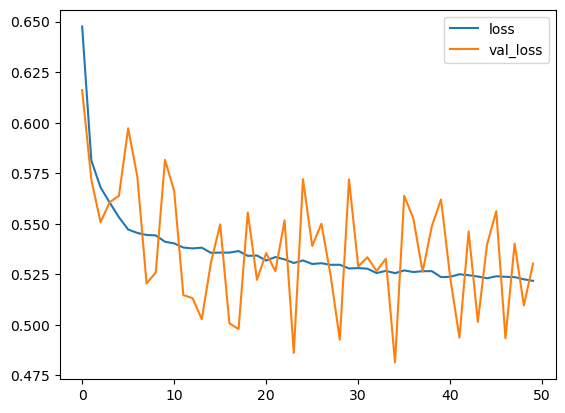

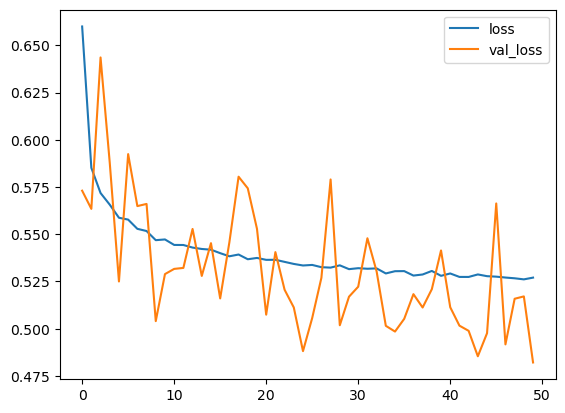

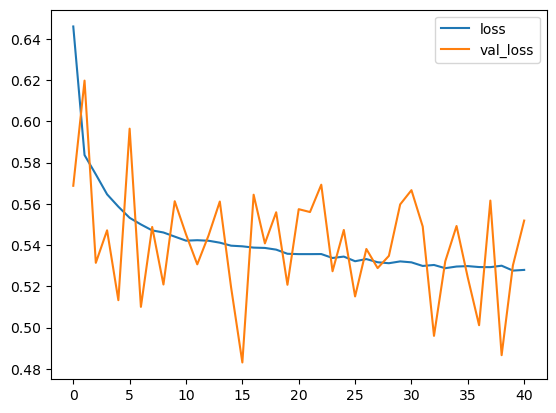

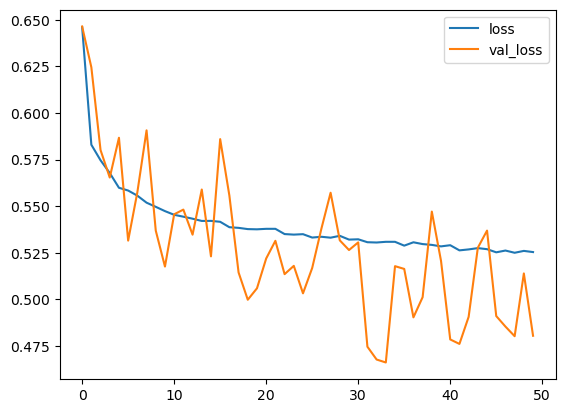

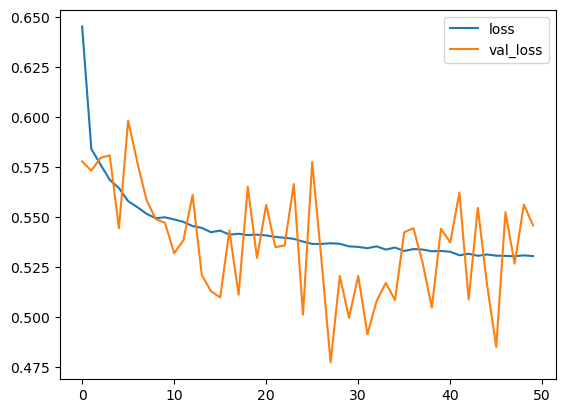

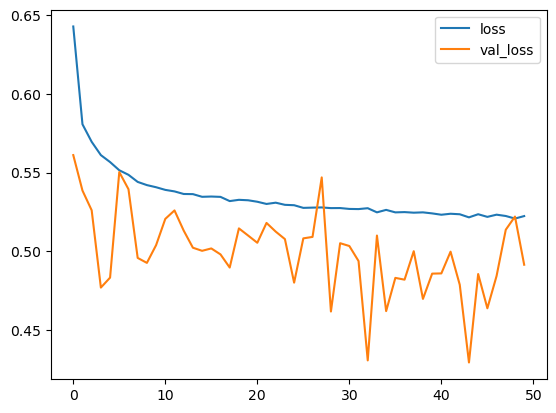

In [264]:
y_pred1 = ANN(0,len(df_class1),50)
y_pred2 = ANN(len(df_class1),len(df_class1)*2,50)
y_pred3 = ANN(len(df_class1)*2 ,len(df_class1)*3,50)
y_pred4 = ANN(len(df_class1)*3 ,len(df_class1)*4,50)
y_pred5 = ANN(len(df_class1)*4 ,len(df_class1)*5,50)
y_pred6 = ANN(len(df_class1)*5, len(df_class0),50)

In [269]:
y_pred_final = y_pred1
for i in range(len(y_test)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] + y_pred4[i] + y_pred5[i]+ y_pred6[i]
    if n_ones >=4:
        y_pred_final[i] =1
    else:
        y_pred_final[i] = 0

In [270]:
print(classification_report(y_pred_final, y_test))

              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82     49235
         1.0       0.78      0.31      0.44     26869

    accuracy                           0.72     76104
   macro avg       0.75      0.63      0.63     76104
weighted avg       0.74      0.72      0.68     76104



In [271]:
from imblearn.over_sampling import SMOTE

In [275]:
sm =SMOTE()

In [284]:
from sklearn.model_selection import train_test_split
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [285]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Epoch 1/50
9555/9555 [==============================] - 41s 4ms/step - loss: 0.5936 - val_loss: 0.5747
Epoch 2/50
9555/9555 [==============================] - 41s 4ms/step - loss: 0.5550 - val_loss: 0.5441
Epoch 3/50
9555/9555 [==============================] - 41s 4ms/step - loss: 0.5480 - val_loss: 0.5539
Epoch 4/50
9555/9555 [==============================] - 40s 4ms/step - loss: 0.5440 - val_loss: 0.5299
Epoch 5/50
9555/9555 [==============================] - 41s 4ms/step - loss: 0.5402 - val_loss: 0.5461
Epoch 6/50
9555/9555 [==============================] - 43s 4ms/step - loss: 0.5363 - val_loss: 0.5566
Epoch 7/50
9555/9555 [==============================] - 43s 4ms/step - loss: 0.5342 - val_loss: 0.5705
Epoch 8/50
9555/9555 [==============================] - 42s 4ms/step - loss: 0.5320 - val_loss: 0.5602
Epoch 9/50
9555/9555 [==============================] - 40s 4ms/step - loss: 0.5292 - val_loss: 0.5359
Epoch 10/50
9555/9555 [==============================] - 45s 5ms/step - l

<Axes: >

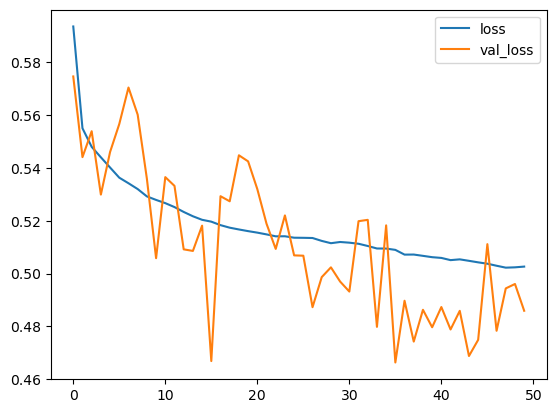

In [286]:
early_stopping = EarlyStopping(monitor="val_loss", mode=min , patience= 25, verbose= 1)
model = Sequential()

model.add(Dense(units = 20, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 18, activation= "sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(units = 18, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 15, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 15, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 10, activation= "sigmoid"))
model.add(Dropout(0.2))

model.add(Dense(units = 5, activation= "sigmoid"))


model.add(Dense(units = 1, activation= "sigmoid"))

model.compile(optimizer= "adam", loss= "binary_crossentropy")

history = model.fit(x = X_train_res, y = y_train_res, epochs=50, validation_data = (X_test, y_test),
                    callbacks= [early_stopping])
print(classification_report(np.round(model.predict(X_test)), y_test))   
pd.DataFrame(history.history).plot()

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [8]:
log_model.fit(X = X_train, y = y_train)

C:\Users\shake\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
predictions = log_model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     65523
         1.0       0.51      0.14      0.22     10581

    accuracy                           0.86     76104
   macro avg       0.69      0.56      0.57     76104
weighted avg       0.83      0.86      0.83     76104



In [14]:
from imblearn.over_sampling import SMOTE

In [20]:
sm =SMOTE()

In [21]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [22]:
log_model_smote = LogisticRegression()

In [24]:
log_model_smote.fit(X = X_train_res, y = y_train_res)

C:\Users\shake\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
smote_predictions = log_model_smote.predict(X_test)

In [26]:
print(classification_report(y_test, smote_predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     65461
         1.0       0.30      0.76      0.43     10643

    accuracy                           0.72     76104
   macro avg       0.63      0.74      0.63     76104
weighted avg       0.86      0.72      0.76     76104



In [27]:
#majority vote

In [28]:
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [29]:
df3 = X_train.copy()
df3["Diabetes_binary"] = y_train
df_class1 = df3[df3["Diabetes_binary"]== 1]
df_class0 = df3[df3["Diabetes_binary"] == 0]

In [30]:
df_split_1 = df_class0[:len(df_class1)]
df_split_2 = df_class0[len(df_class1):len(df_class1)*2 ]
df_split_3 = df_class0[len(df_class1)*2 :len(df_class1)*3]
df_split_4 = df_class0[len(df_class1)*3 :len(df_class1)*4]
df_split_5 = df_class0[len(df_class1)*4 :len(df_class1)*5]
df_split_6 = df_class0[len(df_class1)*5:]

In [37]:
def log_reg(X_train, y_train):
    log_model = LogisticRegression()
    log_model.fit(X = X_train, y = y_train)
    return log_model.predict(X_test)

In [56]:
y_pred1 = log_reg(pd.concat([df_split_1, df_class1], axis = 0).drop("Diabetes_binary", axis = 1), pd.concat([df_split_1, df_class1], axis = 0)["Diabetes_binary"])
y_pred2 = log_reg(pd.concat([df_split_2, df_class1], axis = 0).drop("Diabetes_binary", axis = 1), pd.concat([df_split_2, df_class1], axis = 0)["Diabetes_binary"])
y_pred3 = log_reg(pd.concat([df_split_3, df_class1], axis = 0).drop("Diabetes_binary", axis = 1), pd.concat([df_split_3, df_class1], axis = 0)["Diabetes_binary"])
y_pred4 = log_reg(pd.concat([df_split_4, df_class1], axis = 0).drop("Diabetes_binary", axis = 1), pd.concat([df_split_4, df_class1], axis = 0)["Diabetes_binary"])
y_pred5 = log_reg(pd.concat([df_split_5, df_class1], axis = 0).drop("Diabetes_binary", axis = 1), pd.concat([df_split_5, df_class1], axis = 0)["Diabetes_binary"])
y_pred6 = log_reg(pd.concat([df_split_6, df_class1], axis = 0).drop("Diabetes_binary", axis = 1), pd.concat([df_split_6, df_class1], axis = 0)["Diabetes_binary"])


C:\Users\shake\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shake\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [57]:
y_pred_final = y_pred1
for i in range(len(y_test)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i] + y_pred4[i] + y_pred5[i]+ y_pred6[i]
    if n_ones >=4:
        y_pred_final[i] =1
    else:
        y_pred_final[i] = 0

In [58]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     65500
         1.0       0.31      0.75      0.44     10604

    accuracy                           0.73     76104
   macro avg       0.63      0.74      0.63     76104
weighted avg       0.86      0.73      0.77     76104



In [63]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [64]:
rfc_predictions = rfc.predict(X_test)

In [65]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     65557
         1.0       0.50      0.17      0.25     10547

    accuracy                           0.86     76104
   macro avg       0.69      0.57      0.59     76104
weighted avg       0.83      0.86      0.83     76104



In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score)


param_grid = {'n_estimators': [200, 500, 1000, 2000, 3000]}  # Adjust this range based on your problem

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']


In [70]:
best_n_estimators

200

In [73]:
grid_pred = grid_search.predict(X_test)

In [74]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     65557
         1.0       0.49      0.17      0.25     10547

    accuracy                           0.86     76104
   macro avg       0.69      0.57      0.59     76104
weighted avg       0.83      0.86      0.83     76104



In [78]:
#oversampeling after split
df.drop_duplicates(inplace = True)

In [80]:
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
y_train.value_counts()

0.0    136115
1.0     24516
Name: Diabetes_binary, dtype: int64

In [82]:
df_oversampled = X_train.copy()
df_oversampled["Diabetes_binary"] = y_train
df_oversampled_1 = df_oversampled[df_oversampled["Diabetes_binary"] == 1]
df_oversampled_0 = df_oversampled[df_oversampled["Diabetes_binary"] == 0]


In [83]:
df_oversampled_1.shape, df_oversampled_0.shape

((24516, 22), (136115, 22))

In [86]:
a = df_oversampled_1.sample(n = len(df_oversampled_0), replace=True)

In [87]:
df_oversampled = pd.concat([df_oversampled_0, a], axis = 0)
X_train = df_oversampled.drop("Diabetes_binary", axis = 1)
y_train = df_oversampled["Diabetes_binary"]

In [88]:
y_train.value_counts()

0.0    136115
1.0    136115
Name: Diabetes_binary, dtype: int64

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [94]:
rfc_predictions = rfc.predict(X_test)

In [95]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     58262
         1.0       0.43      0.30      0.35     10581

    accuracy                           0.83     68843
   macro avg       0.65      0.61      0.63     68843
weighted avg       0.81      0.83      0.82     68843



In [96]:
#Smote
X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


df_oversampled = X_train.copy()
df_oversampled["Diabetes_binary"] = y_train
df_oversampled_1 = df_oversampled[df_oversampled["Diabetes_binary"] == 1]
df_oversampled_0 = df_oversampled[df_oversampled["Diabetes_binary"] == 0]



In [98]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [106]:
X_train, y_train = sm.fit_resample(X = X_train,y =  y_train)

In [107]:
y_train.value_counts()

0.0    136195
1.0    136195
Name: Diabetes_binary, dtype: int64

In [108]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [109]:
rfc_predictions = rfc.predict(X_test)

In [110]:
form 
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     58182
         1.0       0.44      0.18      0.26     10661

    accuracy                           0.84     68843
   macro avg       0.65      0.57      0.58     68843
weighted avg       0.80      0.84      0.81     68843



In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("Diabetes_binary", axis = 1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [7]:
mlp.fit(X_train, y_train)

MLPClassifier()

In [8]:
mlp_pred = mlp.predict(X_test)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65581
         1.0       0.56      0.17      0.26     10523

    accuracy                           0.87     76104
   macro avg       0.72      0.57      0.59     76104
weighted avg       0.84      0.87      0.83     76104



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score)
param_grid = {"hidden_layer_sizes": range(10),
               "activation" : ['identity', 'logistic', 'tanh', 'relu'],
             "learning_rate": ['constant', 'invscaling', 'adaptive'],
             "alpha" : [0.00001,0.0001,0.001,0.01,0.1,1,10],
             }
gridsearch = GridSearchCV(MLPClassifier(), param_grid, scoring= scorer, refit= "f1")

In [ ]:
gridsearch.fit(X_train, y_train)

In [9]:
from sklearn.ensemble import AdaBoostClassifier

In [10]:
model = AdaBoostClassifier()

In [12]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [13]:
pred = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65376
         1.0       0.57      0.17      0.26     10728

    accuracy                           0.86     76104
   macro avg       0.72      0.57      0.59     76104
weighted avg       0.83      0.86      0.83     76104



In [15]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [10]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 7.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
from xgboost import XGBClassifier

In [17]:
model = XGBClassifier()

In [18]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
pred = model.predict(X_test)

In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65376
         1.0       0.57      0.17      0.26     10728

    accuracy                           0.86     76104
   macro avg       0.72      0.57      0.59     76104
weighted avg       0.83      0.86      0.83     76104



In [1]:
model = AdaBoostClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')


NameError: name 'AdaBoostClassifier' is not defined